In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date

In [2]:
raw_data = pd.ExcelFile('Raw_data.xlsx')
sheet_names = raw_data.sheet_names
sheet_names

['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']

In [3]:
cust_demo = pd.read_excel('Raw_data.xlsx', sheet_name = 'CustomerDemographic')

In [4]:
cust_demo.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

The data-type of columns looks fine. However here **"default"** is an irrelevent column which should be dropped / deleted from the dataset. Let's check for the data quality and apply data cleaning process where ever applicable to clean our dataset before performing any analysis.

# Total records

In [6]:
print("Total records (rows) in the dataset: {}".format(cust_demo.shape[0]))
print("Total columns (features) in the dataset: {}".format(cust_demo.shape[1]))

Total records (rows) in the dataset: 4000
Total columns (features) in the dataset: 13


# Numeric Columns and Non-Numeric Columns

In [7]:
df_numeric = cust_demo.select_dtypes(include = [np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are: {}".format(numeric_cols))

df_non_numeric = cust_demo.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("\nThe non-numeric columns are : {}".format(non_numeric_cols))

The numeric columns are: ['customer_id' 'past_3_years_bike_related_purchases' 'tenure']

The non-numeric columns are : ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'default'
 'owns_car']


# 1. Dropping Irrelevent Columns

**"default"** is an irrelevent column. Hence it should be dropped.

In [8]:
cust_demo.drop('default', axis = 1, inplace = True)

# 2. Missing Values Check

Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [9]:
# Total number of missing values

cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [10]:
# Percentage of missing values

cust_demo.isnull().mean() * 100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

Here it is observed that columns like **"last_name"**, **"DOB"**, **"job_title"**, **"job_industry_category"** and **"tenure"** have missing values.

## 2.1 Last Name

In [11]:
# Checking for the presence of first name and customer id in records where last name is missing.

cust_demo[cust_demo['last_name'].isnull()][['first_name', 'customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

Since All customers have a customer_id and First name, all the customers are identifiable. **Hence it is okay for to not have a last name. Filling null last names with "None"**.

In [12]:
# Fetching records where last name is missing.

cust_demo[cust_demo['last_name'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
66,67,Vernon,NaN,Male,67,1960-06-14 00:00:00,Web Developer II,Retail,Mass Customer,N,No,18.0
105,106,Glyn,NaN,Male,54,1966-07-03 00:00:00,Software Test Engineer III,Health,High Net Worth,N,Yes,18.0
138,139,Gar,NaN,Male,1,1964-07-28 00:00:00,Operator,Telecommunications,Affluent Customer,N,No,4.0
196,197,Avis,NaN,Female,32,1977-01-27 00:00:00,NaN,NaN,High Net Worth,N,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3885,Asher,NaN,Male,55,1978-06-17 00:00:00,Actuary,Financial Services,Mass Customer,N,Yes,8.0
3915,3916,Myrtia,NaN,Female,31,1958-10-17 00:00:00,NaN,Retail,Affluent Customer,N,Yes,17.0
3926,3927,Conway,NaN,Male,29,1978-01-07 00:00:00,Electrical Engineer,Manufacturing,Mass Customer,N,Yes,7.0
3961,3962,Benoit,NaN,Male,17,1977-10-06 00:00:00,Project Manager,Argiculture,High Net Worth,N,Yes,14.0


In [13]:
# Filling missing Last names with "None"

cust_demo['last_name'].fillna('None', inplace = True)

In [14]:
cust_demo['last_name'].isnull().sum()

0

Currently there are no missing values for **"last_name"** column.

## 2.2 Date of Birth

In [15]:
cust_demo['DOB'] = pd.to_datetime(cust_demo['DOB'])

In [16]:
cust_demo[cust_demo['DOB'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,Yes,NaN


In [17]:
round(cust_demo['DOB'].isnull().mean() * 100)

2

Since less than **5 %** of data has null **date of birth**. we can remove the records where date of birth is null.

In [18]:
drop_index_drop = cust_demo[cust_demo['DOB'].isnull()].index
drop_index_drop

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [19]:
cust_demo.drop(index = drop_index_drop, axis = 0, inplace = True)

In [20]:
cust_demo['DOB'].isnull().sum()

0

Currently there are no missing values for **"DOB"** column.

### Creating **"age"** Column for checking further descripency in data

In [21]:
today_data = datetime(2017, 12, 31)
today_data

datetime.datetime(2017, 12, 31, 0, 0)

In [22]:
cust_demo['age'] = (today_data - cust_demo['DOB']).dt.days // 365
cust_demo.drop('DOB', axis=1, inplace=True)
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,63
3,4,Talbot,None,Male,33,NaN,IT,Mass Customer,N,No,7.0,56
4,5,Sheila-kathryn,Calton,Female,56,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,40


C:\Users\adamy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


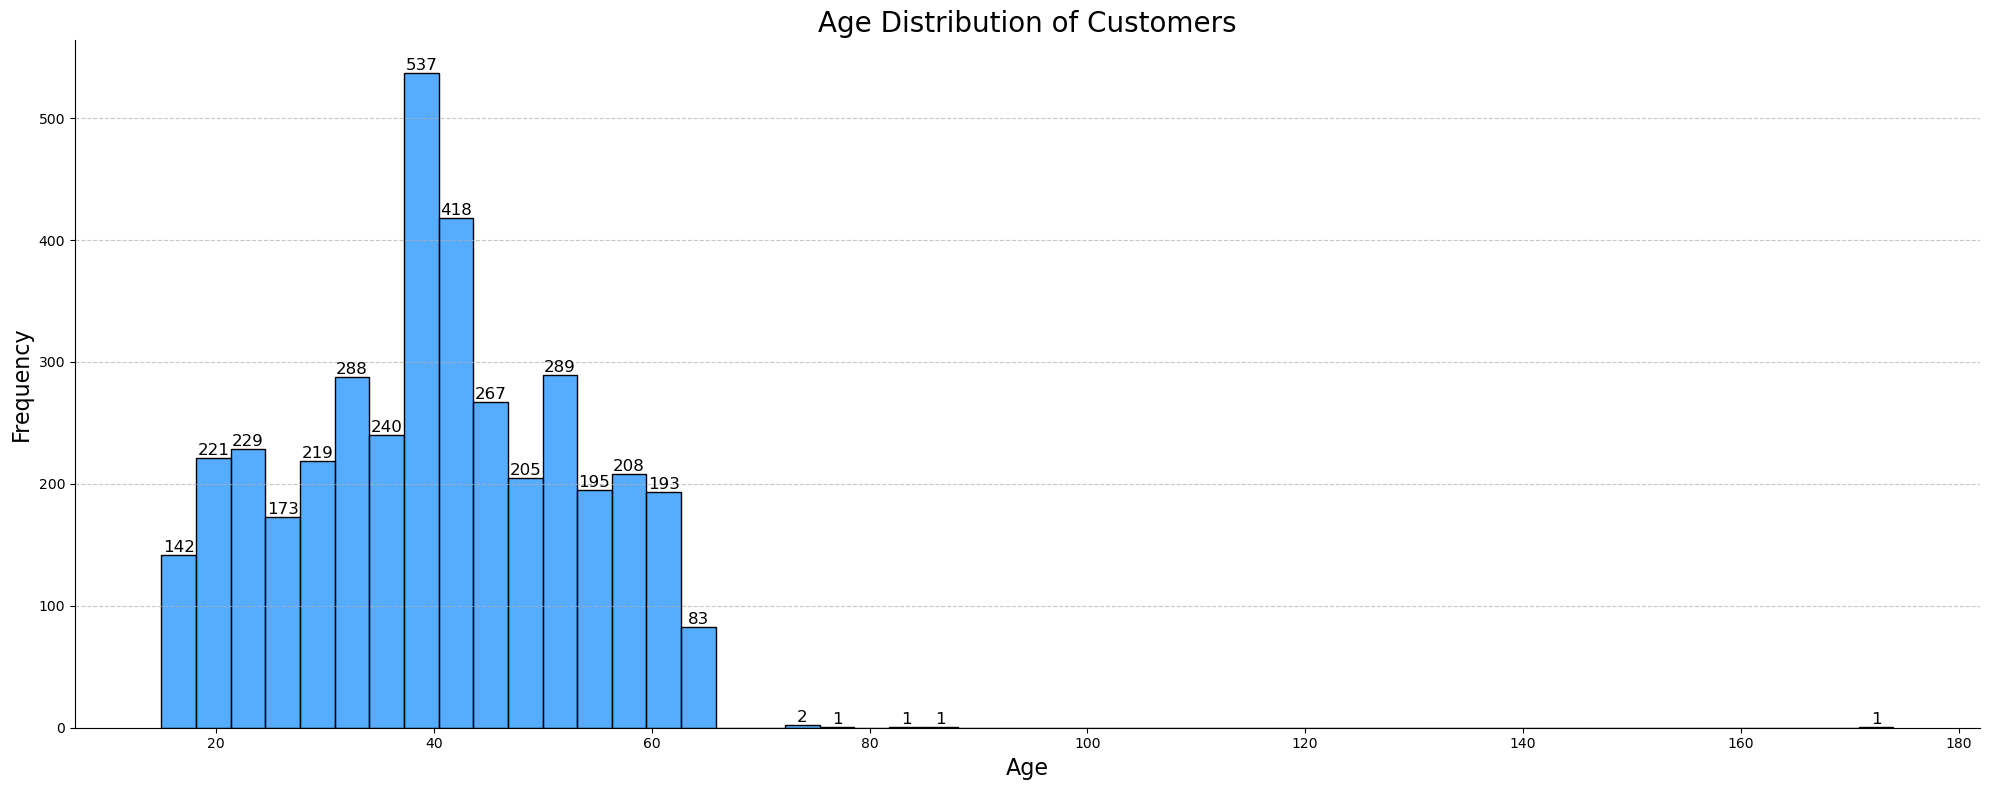

In [23]:
# Age Distribution Visualization
plt.figure(figsize=(20, 8))

# Histogram of the 'age' column with 50 bins
sns.histplot(cust_demo['age'], bins=50, kde=False, color='dodgerblue')

# Adding title and labels with larger font sizes
plt.title('Age Distribution of Customers', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Remove top and right spines for a cleaner look
sns.despine()

# Adding number labels above each bar for better insights
ax = plt.gca()  # Get the current axis
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the bar has a height
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=12)

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

**Statistics of the Age column**

In [82]:
cust_demo['age'].describe()

count    3913.000000
mean       39.998211
std        12.808095
min        15.000000
25%        30.000000
50%        40.000000
75%        49.000000
max       174.000000
Name: age, dtype: float64

Here we find there is only 1 customer with an age of **174**. Clearly this is an outlier since the 75th percentile of Age is **49**.

In [83]:
cust_demo[cust_demo['age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,age
33,34,Jephthah,Bachmann,U,59,Legal Assistant,IT,Affluent Customer,N,No,20.0,180,174


Here we see a customer with age **174** which is an outlier. hence we need to remove this record.

In [85]:
age_index_drop = cust_demo[cust_demo['age'] > 100].index
cust_demo.drop(index = age_index_drop, axis = 0, inplace = True)

## 2.3 Tenure

**When Date of Birth was Null the Tenure was also Null. Hence after removing null DOBs from dataframe , null tenures were also removed.**

In [86]:
cust_demo['tenure'].isnull().sum()

0

There are no missing values for Tenure column.

## 2.4 Job Title

In [88]:
cust_demo[cust_demo['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,age
3,4,Talbot,None,Male,33,NaN,IT,Mass Customer,N,No,7.0,63,56
5,6,Curr,Duckhouse,Male,35,NaN,Retail,High Net Worth,N,Yes,13.0,58,51
6,7,Fina,Merali,Female,6,NaN,Financial Services,Affluent Customer,N,Yes,11.0,48,41
10,11,Uriah,Bisatt,Male,99,NaN,Property,Mass Customer,N,No,9.0,70,63
21,22,Deeanne,Durtnell,Female,79,NaN,IT,Mass Customer,N,No,11.0,61,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3968,Alexandra,Kroch,Female,99,NaN,Property,High Net Worth,N,No,22.0,46,40
3971,3972,Maribelle,Schaffel,Female,6,NaN,Retail,Mass Customer,N,No,8.0,45,38
3978,3979,Kleon,Adam,Male,67,NaN,Financial Services,Mass Customer,N,Yes,18.0,50,43
3986,3987,Beckie,Wakeham,Female,18,NaN,Argiculture,Mass Customer,N,No,7.0,60,53


Since Percentage of missing Job is **12.6%**. We will replace null values with Missing.

In [89]:
cust_demo['job_title'].fillna('Missing', axis = 0, inplace = True)

In [90]:
cust_demo['job_title'].isnull().sum()

0

Currently there are no mssing values for **"job_title"** column.

## 2.5 Job Industry Category

In [93]:
cust_demo[cust_demo['job_industry_category'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,age
4,5,Sheila-kathryn,Calton,Female,56,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,47,40
7,8,Rod,Inder,Male,31,Media Manager I,NaN,Mass Customer,N,No,7.0,62,55
15,16,Harlin,Parr,Male,38,Media Manager IV,NaN,Mass Customer,N,Yes,18.0,47,40
16,17,Heath,Faraday,Male,57,Sales Associate,NaN,Affluent Customer,N,Yes,15.0,62,55
17,18,Marjie,Neasham,Female,79,Professor,NaN,Affluent Customer,N,No,11.0,57,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,3966,Astrix,Sigward,Female,53,Geologist I,NaN,Mass Customer,N,Yes,11.0,56,49
3973,3974,Misha,Ranklin,Female,82,Technical Writer,NaN,Affluent Customer,N,Yes,9.0,63,56
3975,3976,Gretel,Chrystal,Female,0,Internal Auditor,NaN,Affluent Customer,N,Yes,13.0,66,60
3982,3983,Jarred,Lyste,Male,19,Graphic Designer,NaN,Mass Customer,N,Yes,9.0,59,52


Since Percentage of missing Job Industry Category is **16%**. We will replace null values with Missing

In [94]:
cust_demo['job_industry_category'].fillna('Missing', axis = 0, inplace = True)

In [95]:
cust_demo['job_industry_category'].isnull().sum()

0

**Finally there are no Missing Values in the dataset.**

In [96]:
cust_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
age                                    0
dtype: int64

In [97]:
print("Total rows after removing missing values: {}".format(cust_demo.shape[0]))

Total rows after removing missing values: 3912


# 3. Inconsistency Check in Data

We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are **'gender'**, **'wealth_segment'**, **'deceased_indicator'**, **'owns_car'**.

## 3.1 Gender

In [98]:
cust_demo['gender'].value_counts()

gender
Female    2037
Male      1872
F            1
Femal        1
M            1
Name: count, dtype: int64

Here there are inconsistent data in gender column.There are spelling mistakes and typos. For gender with value **"M"** will be replaced with **"Male"**, **"F"** will be replaced by **"Female"** and **"Femal"** will be replaced by **"Female"**.

In [100]:
def replace_gender_names(gender):
    
    # Making Gender as Male and Female as standards
    if gender=='M':
        return 'Male'
    elif gender=='F':
        return 'Female'
    elif gender=='Femal':
        return 'Female'
    else :
        return gender

cust_demo['gender'] = cust_demo['gender'].apply(replace_gender_names)

In [101]:
cust_demo['gender'].value_counts()

gender
Female    2039
Male      1873
Name: count, dtype: int64

The inconsistent data, spelling mistakes, and typos in gender column are removed.

## 3.2 Wealth Segment

There is no **inconsistent data** in **"wealth_segment"** column.

In [103]:
cust_demo['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: count, dtype: int64

## 3.3 Deceased Indicator

There is no **inconsistent data** in **"deceased_indicator"** column.

In [104]:
cust_demo['deceased_indicator'].value_counts()

deceased_indicator
N    3910
Y       2
Name: count, dtype: int64

## 3.4 Owns a Car

There is no **inconsistent data** in **"owns_car"** column.

In [105]:
cust_demo['owns_car'].value_counts()

owns_car
Yes    1974
No     1938
Name: count, dtype: int64

# 4. Columns order

In [110]:
new_column_order = ['customer_id', 'first_name', 'last_name', 'gender', 'age', 'past_3_years_bike_related_purchases', 'job_title',
                    'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure']

cust_demo = cust_demo[new_column_order]
cust_demo.head()

,customer_id,first_name,last_name,gender,age,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,64,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,37,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,63,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,None,Male,56,33,Missing,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,40,56,Senior Editor,Missing,Affluent Customer,N,Yes,8.0


# 5. Duplication Checks

We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.
For checking for duplicate records we need to firstly remove the **primary key** column of the dataset then apply **drop_duplicates()** function provided by Python.

In [111]:
cust_demo_dedupped = cust_demo.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_demo_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_demo.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3912
Number of records in original dataset : 3912


**Since both the numbers are same. There are no duplicate records in the dataset.**

# 6. Exporting the Cleaned Customer Demographic Data Set to csv

Currently the Customer Demographics dataset is clean. Hence we can export the data to a csv to continue our data analysis of Customer Segments by joining it to other tables.

In [116]:
cust_demo.to_csv('CustomerDemographic_Cleaned.csv', index=False)